In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies
%cd /content/yolov5

In [ ]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
%cd /content/

/content


In [ ]:
!curl -L "https://public.roboflow.com/ds/[api-Key-here]" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
!pip install wandb

     |████████████████████████████████| 2.0MB 8.7MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 163kB 50.0MB/s 
     |████████████████████████████████| 133kB 52.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=21db0b46ff91c91f64f5302191cd1387966d9e8b42ab5fc81964cd74cb26e84b
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=d8fcd761f05d0dbde9d9e6c05e3b79bc3a3f9f32d27faee91150b6a21ec12540
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 5 --data /content/data.yaml --weights yolov5s.pt

/content/yolov5
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 v4.0-134-g6f718ce torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='', data='/content/data.yaml', device='', entity=None, epochs=5, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-14 08:19:29.744875: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
hyperparameters: lr0=0.0

In [ ]:
# Graphs
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

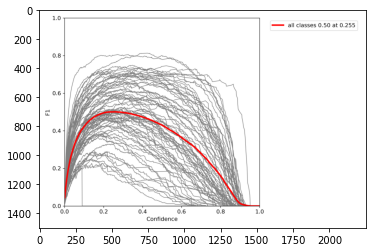

In [ ]:
image = cv2.imread("runs/train/exp/F1_curve.png")
plt.imshow(image)
plt.show()

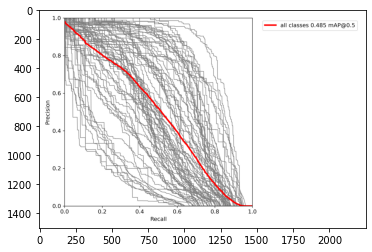

In [ ]:
image = cv2.imread("runs/train/exp/PR_curve.png")
plt.imshow(image)
plt.show()

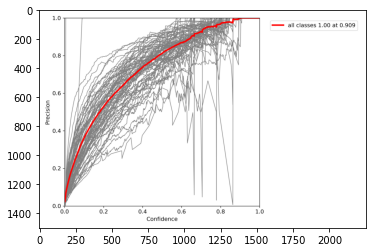

In [ ]:
image = cv2.imread("runs/train/exp/P_curve.png")
plt.imshow(image)
plt.show()

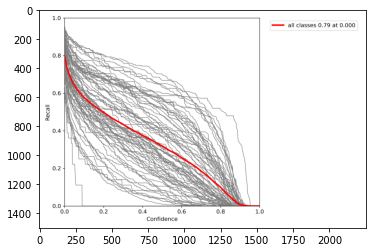

In [ ]:
image = cv2.imread("runs/train/exp/R_curve.png")
plt.imshow(image)
plt.show()

In [ ]:
image = cv2.imread("runs/train/exp/confusion_matrix.png")
fig, ax = plt.subplots(figsize=(18, 20))
ax.imshow(image, interpolation='nearest')

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source ../test_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test_images', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOv5 v4.0-134-g6f718ce torch 1.8.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/1 /content/yolov5/../test_images/101.png: 256x416 17 cars, 1 truck, Done. (0.010s)
Results saved to runs/detect/exp4
Done. (0.041s)


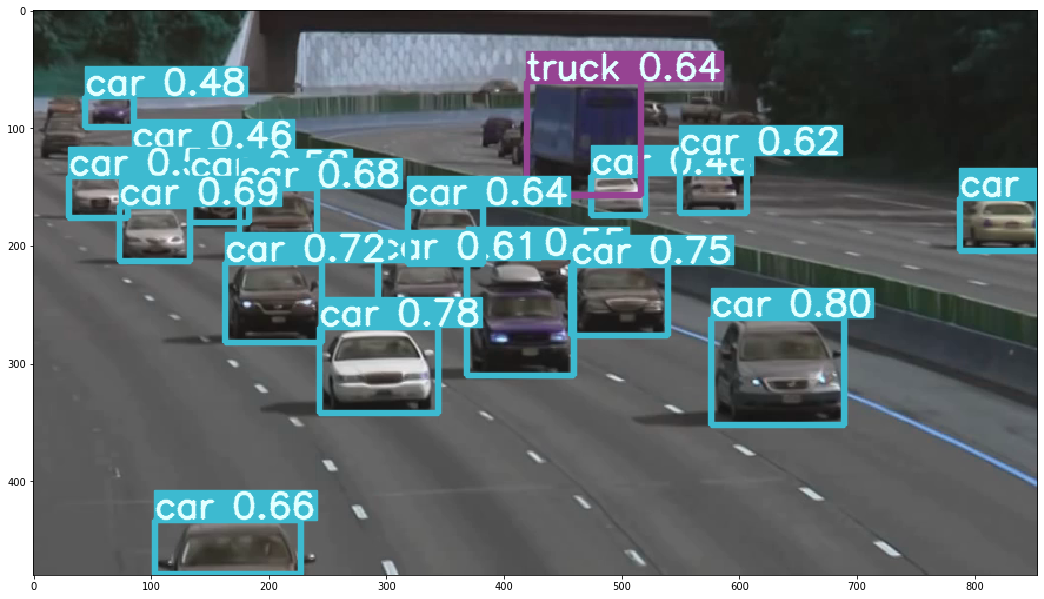

In [ ]:
image = cv2.imread("runs/detect/exp2/101.png")
fig, ax = plt.subplots(figsize=(18, 20))
ax.imshow(image, interpolation='nearest')

In [ ]:
!zip -r /content/runs.zip runs/

In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!unzip runs.zip

In [ ]:
# Fetch some traffic images from the net.
%cd ../test_images/
!curl -o img_1.jpg "https://static2.bigstockphoto.com/0/2/2/large2/220671547.jpg"
!curl -o img_2.jpg "https://ak.picdn.net/shutterstock/videos/1059079175/thumb/1.jpg?ip=x480"
!curl -o img_3.jpg "https://st2.depositphotos.com/2577713/10585/i/950/depositphotos_105856412-stock-photo-large-amounts-of-traffic-in.jpg"
!curl -o img_4.jpg "https://247wallst.files.wordpress.com/2017/07/ahmedabadindia.jpg?w=645&h=363"
!curl -o img_5.jpg "https://c8.alamy.com/comp/2A6WMEY/traffic-congestion-in-delhi-india-2A6WMEY.jpg"
%cd ../yolov5/

/content/test_images
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76292  100 76292    0     0   356k      0 --:--:-- --:--:-- --:--:--  356k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33388  100 33388    0     0   143k      0 --:--:-- --:--:-- --:--:--  144k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  168k  100  168k    0     0   270k      0 --:--:-- --:--:-- --:--:--  270k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  326k  100  326k    0     0   267k      0  0:00:01  0:00:01 --:--:--  267k
  % Total    % Received % Xferd

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source ../test_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test_images', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.0+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/5 /content/yolov5/../test_images/img_1.jpg: 288x416 4 buss, 13 cars, 1 truck, Done. (0.037s)
image 2/5 /content/yolov5/../test_images/img_2.jpg: 256x416 2 buss, 6 cars, 4 persons, 1 truck, Done. (0.022s)
image 3/5 /content/yolov5/../test_images/img_3.jpg: 288x416 12 cars, 1 motorbike, Done. (0.023s)
image 4/5 /content/yolov5/../test_images/img_4.jpg: 256x416 2 buss, 7 cars, 2 persons, 1 truck, Done. (0.022s)
image 5/5 /content/yolov5/../test_images/img_5.jpg: 320x416 1 bus, 11 cars, 1 person, 1 traffic light, Done. (0.